[Reference](https://medium.com/applied-data-science/full-stack-data-scientist-5-automating-report-generation-with-jupyter-notebooks-919e32e88d18)

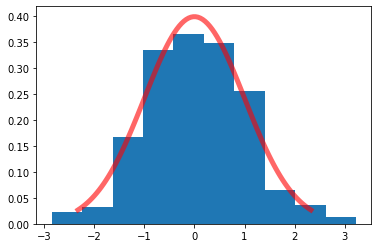

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

LOC = 0
SCALE = 1
r = norm.rvs(size=500, loc=LOC, scale=SCALE)

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01, loc = LOC, scale = SCALE),
                norm.ppf(0.99, loc = LOC, scale = SCALE), 100)
ax.plot(x, norm.pdf(x, loc=LOC, scale=SCALE),
        '-r', lw=5, alpha = 0.6, label='norm pdf')
ax.hist(r, density=True)
plt.show()

In [9]:
print(
    f"""Mean: {r.mean()},
    Max: {r.max()},
    Min: {r.min()},
    Median: {np.median(r)},
    STD: {np.std(r)}
    """
)

Mean: 0.037129172829864346,
    Max: 3.228010205050261,
    Min: -2.852130059474442,
    Median: 0.020128065328940015,
    STD: 0.9823682040249744
    


In [1]:
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
from nbconvert.exporters import HTMLExporter

def create_jupyter_report(mean: float, std: float):
    # Load jupyter notebook into memory
    with open('TEMPLATE-Report.ipynb', 'r') as f:
        nb = nbformat.read(f, as_version=4)
    # Replace placeholders
    # Jupyter notebooks are just a JSON file, so we can use the usual
    # method to find and replace values
    # Replace mean (LOC)
    nb['cells'][1]['source'] = nb['cells'][1]['source'].replace("'PUT_LOC_HERE'",str(mean))
    # Replace std (SCALE)
    nb['cells'][1]['source'] = nb['cells'][1]['source'].replace("'PUT_SCALE_HERE'",str(std))
  
    # Execute Notebook
    proc = ExecutePreprocessor(timeout=600, kernel_name='python3')
    proc.preprocess(nb)
    
    # Export to HTML file
    exporter = HTMLExporter()
    with open(f'Report_mean-{mean}_std-{std}.html', 'w') as f:
        f.write(exporter.from_notebook_node(nb)[0])

In [2]:
from create_jupyter_report import create_jupyter_report

params = [
  (10,1),
  (5,2),
  (100,10),
  (35,4)
]

for p in params:
  create_jupyter_report(mean=p[0], std=p[1])